# T-S diagram
Here is an example of creating a T-S diagram

In [1]:
import gsw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Step 1 download data from BATS and create data vectors
df=pd.read_excel('b10331_ctd.xls')
data=df.to_numpy()
castid=data[:,0]
lat=data[:,3]
lon=-data[:,4]
p=data[:,6]
t=data[:,7]
sp=data[:,9]

In [3]:
# TEOS-10 calculations
SA=gsw.SA_from_SP(sp,p,lon,lat);
CT=gsw.CT_from_t(SA,t,p);

In [4]:
# define X and Y axes of the T-S diagram
s0=np.linspace(np.nanmin(SA),np.nanmax(SA),100)
t0=np.linspace(np.nanmin(CT),np.nanmax(CT),100)
X,Y=np.meshgrid(s0,t0)

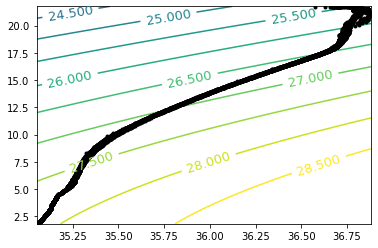

In [5]:
# create sigma-theta array
sig=gsw.sigma0(X,Y)
# plot the density contours
fig,ax=plt.subplots()
cont=np.arange(22,29,.5)
c=ax.contour(X,Y,sig,cont)
ax.clabel(c,inline=True,fontsize=13)
plt.plot(SA,CT,'k.')
plt.show()